In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from package_global_functions import *

latexFont(ticklabelssize=12,labelsize=14) # ticklabelssize=10, labelsize=12, legendsize=8

model = 'Galla'
pis = [0.3, 0.3]
qs = [7, 10]
lambs = [0.3, 0.6, 0.9]
lambs_colors_r = plt.cm.spring(np.linspace(0.1,0.9,len(lambs)))
lambs_colors_N = plt.cm.winter(np.linspace(0.1,0.9,len(lambs)))
lambs_colors = plt.cm.gnuplot(np.linspace(0.05, 0.9,len(lambs)))
lambs_colors = ['xkcd:blue', 'xkcd:green', 'xkcd:orange']
# lambs_colors = ['xkcd:blue', 'xkcd:green']
arena_r = 20.0
exclusion_r = 1.5

In [2]:
# percolation exponents:
nu, df_expo = 4/3, 182/96

def perc_dens(N:int):
    # return 11.0*N**(-1/(nu*df_expo)) + 1.1
    return 14.0*N**(-1/(nu*df_expo)) + 0.4
    # return np.exp(2.5638)*N**(-0.3747) + 0.4

def perc_r(N):
    # return 58.11*N**(-0.65)
    # return 71.1796*N**(-0.6681)
    # return 57.87*N**(-0.62) # fent l'ajust de rint
    return np.sqrt(3000*N**(-1.21)) # fent l'ajust de rint**2, que es el que ensenyem al paper
    # return np.sqrt(5100*N**(-1.34)) # fent l'ajust de rint**2 sense errorbars
    # return N/N

# provant a ull
def perc_r_kilobots_ull(N):
    # return 170*N**(-0.6681*1.6)
    # return 75*N**(-0.6681*1.25)
    return 25*N**(-0.6681*0.8)

# fent l'estudi del mcs
def perc_r_kilobots(N):
    # return 65.3344*N**(-0.7805) # ajustant amb fins N=40 i splines
    # return 61.1859*N**(-0.7573) # ajustant amb fins N = 45 i splines
    # return 49.5473*N**(-0.7018) # ajsutant amb fins N = 45 i sense splines
    return np.sqrt(1500*N**(-1.26)) # fent l'ajust de rint**2, que es el que ensenyem al paper
    # return np.sqrt(3700*N**(-1.52)) # fent l'ajust de rint**2 sense errorbars
    # return 1.0


use_rstar = True

mean_field = 'sim'
sols_lamb = []

if mean_field == 'analytic':
# mean field analytic solutions:
    pi1, pi2, q1, q2 = 0.3, 0.3, 7, 10
    
    for l in lambs:
        call(f'python ../det_sols_from_polynomial/f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l} -v > sols.dat', shell=True)
        sols = []
        with open('sols.dat', 'r') as file:
            for line in file.readlines():
                sols_i = [float(f) for f in line.split()]
                sols.append(sols_i)
        sols_lamb.append(sols[1])
else:
    # mean field simulation results:
    # mean field simulation (N=35)
    dfmf = pd.read_csv('../figures_paper_model_and_kbs/sim_results.csv')
    dfmf = dfmf.rename(columns={'lambda':'lamb'})
    dfmf = dfmf.query('lamb <= 0.9')
    dfmf_sym = dfmf.query('q1 == @qs[0] & q2 == @qs[1] & pi1 == @pis[0] & pi2 == @pis[1]')
    for l in lambs:
        sols_lamb.append([float(dfmf_sym.query('lamb == @l')['f0'].iloc[0]),
                        float(dfmf_sym.query('lamb == @l')['f1'].iloc[0]),
                        float(dfmf_sym.query('lamb == @l')['f2'].iloc[0])])


In [ ]:
print(sols_lamb)

NameError: name 'ln2' is not defined

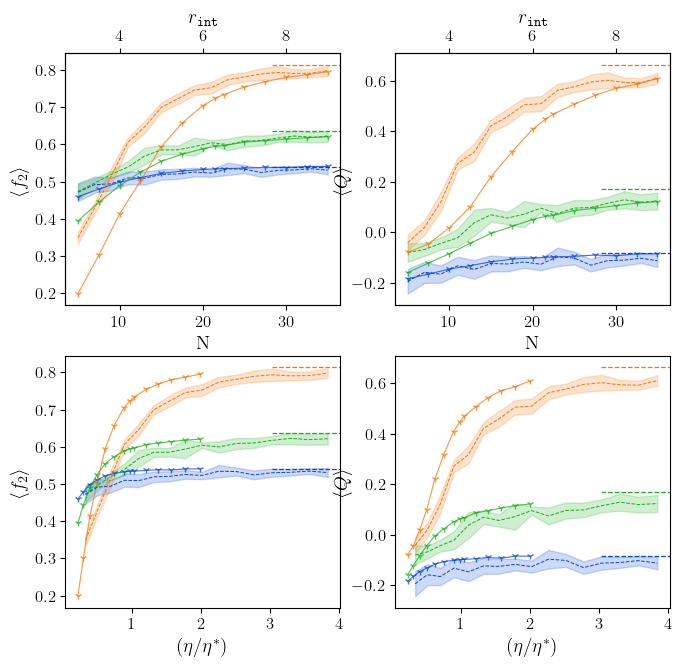

In [7]:
fig, ax = plt.subplots(2,2,figsize=(3.9*2,3.6*2))
ax[0,0].set(xlabel='N', ylabel=r'$\langle f_2 \rangle$')
ax[0,1].set(xlabel='N', ylabel=r'$\langle Q \rangle$')
ax[1,0].set(xlabel=r'$(\eta/\eta^*)$', ylabel=r'$\langle f_2 \rangle$')
ax[1,1].set(xlabel=r'$(\eta/\eta^*)$', ylabel=r'$\langle Q \rangle$')

ax[0,1].set_ylabel(r'$\langle Q \rangle$', labelpad=0.0)
ax[1,1].set_ylabel(r'$\langle Q \rangle$', labelpad=0.0)

ax_ir_f2 = ax[0,0].twiny()
ax_ir_Q = ax[0,1].twiny()
ax_ir_f2.set_xlabel(r'$r_{\tt int}$')
ax_ir_Q.set_xlabel(r'$r_{\tt int}$')

# analytic mean field solution:
for l,sol_lamb,lcolor in zip(lambs, sols_lamb, lambs_colors):
    ax[0,0].axhline(sol_lamb[2], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[0,1].axhline(sol_lamb[2]-2*sol_lamb[1], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[1,0].axhline(sol_lamb[2], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[1,1].axhline(sol_lamb[2]-2*sol_lamb[1], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')

# quenched simulations data, N = 35, varying interac_r
marker = '1'
N = 35
perc_dens_fixN = perc_dens(N)
perc_r_fixN = perc_r(N)
df = pd.read_csv(f'{model}/{N}_bots/sim_fp_results_er_{exclusion_r}_NOPUSH.csv')
df = df.loc[(df['arena_r']==arena_r) & (df['pi1']==pis[0]) & (df['pi2']==pis[1]) & (df['q1']==qs[0]) & (df['q2']==qs[1])]
# df = df.query('interac_r <= 7.5')
df = df.query('interac_r <= 9.0')
df = df[df.interac_r != 20.0]
df = df.rename(columns={"lambda":"lamb"})
df['eta'] = N*(df['interac_r']/arena_r)**2
df['eta_star'] = N*(perc_r_fixN/arena_r)**2
df['eta_frac'] = [eta/eta_star for eta, eta_star in zip(df['eta'], df['eta_star'])]
for l,lcolor in zip(lambs,lambs_colors):
    dfl = df.query('lamb == @l')
    # labels to identify quenched/kilombo/kilobot
    if l == 0.3:
        ln1, = ax_ir_f2.plot(dfl['interac_r'], dfl['f2'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, label='Quenched, varying $r_i$')
    else:
        ax_ir_f2.plot(dfl['interac_r'], dfl['f2'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
    ax_ir_Q.plot(dfl['interac_r'], dfl['Q'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
    # rescaled plots, choose if rescale by r* or p*
    if use_rstar:
        ax[1,0].plot(dfl['eta_frac'], dfl['f2'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
        ax[1,1].plot(dfl['eta_frac'], dfl['Q'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
    else:
        ax[1,0].plot(N*(dfl['interac_r']/arena_r)**2/perc_dens_fixN, dfl['f2'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
        ax[1,1].plot(N*(dfl['interac_r']/arena_r)**2/perc_dens_fixN, dfl['Q'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)


# # quenched simulations data, interac_r = 6.5, varying N
# marker = '.'
# interac_r = 6.5
# Ns = [10, 15, 20, 25, 30, 35, 40] # 50, 60, 70, 80
# for l,lcolor in zip(lambs,lambs_colors):
#     f1_dif_N, f2_dif_N = [], []
#     for N in Ns:
#         df = pd.read_csv(f'{model}/{N}_bots/sim_fp_results_er_{exclusion_r}_NOPUSH.csv')
#         df = df.rename(columns={"lambda":"lamb"})
#         df = df.query('arena_r == @arena_r & pi1 == @pis[0] & pi2 == @pis[1] & q1 == @qs[0] & q2 == @qs[1] & lamb == @l & interac_r == @interac_r')
#         f1_dif_N.append(float(df['f1'].iloc[0])), f2_dif_N.append(float(df['f2'].iloc[0]))
#     perc_r_difN = perc_r(np.array(Ns))
#     perc_dens_difN = perc_dens(np.array(Ns))
#     Q_dif_N = [f2-2*f1 for f2,f1 in zip(f2_dif_N, f1_dif_N)]
#     # labels to identify quenched/kilombo/kilobot
#     if l == 0.3:
#         ln2, = ax[0,0].plot(Ns, f2_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.', label='Quenched, varying $N$')
#     else:
#         ax[0,0].plot(Ns, f2_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
#     ax[0,1].plot(Ns, Q_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
#     # rescaled plots, choose if rescale by r* or p*
#     if use_rstar:
#         ax[1,0].plot((interac_r/perc_r_difN)**2, f2_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
#         ax[1,1].plot((interac_r/perc_r_difN)**2, Q_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
#     else:
#         ax[1,0].plot(np.array(Ns)*(interac_r/arena_r)**2/perc_dens_difN, f2_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
#         ax[1,1].plot(np.array(Ns)*(interac_r/arena_r)**2/perc_dens_difN, Q_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')


arena_r_k = arena_r - 0.2
# Kilombo simulations data, varying N 
marker='None'
ls, lw = '--', 0.7
factor = 10.0 # neeeee
interac_r = 5.0
for l,lcolor in zip(lambs,lambs_colors):
    dfl = pd.read_csv(f'other_res_files/av_freq_vs_N_lambdas/av_freq_vs_N_lambda{l}_c100.dat', sep='\s+', names=['N', 'f0', 'sdf0', 'f1', 'sdf1', 'f2', 'sdf2', 'Ndata'])
    dfl = dfl[dfl.N % 2 != 0]
    dfl['perc_dens'] = factor**2 * perc_dens(dfl['N'])
    dfl['perc_r'] = perc_r_kilobots(dfl['N'])
    dfl['Q'] = dfl['f2'] - 2*dfl['f1']
    dfl['sdQ'] = np.sqrt(4*(dfl['sdf1'])**2 + dfl['sdf2']**2)
    # dfl['eta'] = dfl['N']*(interac_r/arena_r_k)**2 + dfl['N']*2*interac_r*4/(3.141492*arena_r_k**2)
    dfl['eta'] = dfl['N']*((interac_r+3.0)/arena_r_k)**2
    dfl['eta_star'] = [N*(rstar/arena_r)**2 for N,rstar in zip(dfl['N'], dfl['perc_r'])]
    dfl['eta_frac'] = [eta/eta_star for eta,eta_star in zip(dfl['eta'], dfl['eta_star'])]
    # labels to identify quenched/kilombo/kilobot
    if l == 0.3:
        ln3, = ax[0,0].plot(dfl['N'], dfl['f2'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw, label='Kilombo, varying $N$')
    else:
        ax[0,0].plot(dfl['N'], dfl['f2'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
    ax[0,0].fill_between(dfl['N'], dfl['f2']-dfl['sdf2'], dfl['f2']+dfl['sdf2'], color=lcolor, alpha=0.2)
    ax[0,1].plot(dfl['N'], dfl['Q'], color=lcolor, marker=marker, ls=ls, markersize=4, lw=lw)
    ax[0,1].fill_between(dfl['N'], dfl['Q']-dfl['sdQ'], dfl['Q']+dfl['sdQ'], color=lcolor, alpha=0.2)
    # rescaled plots, choose if rescale by r* or p*
    if use_rstar:
        ax[1,0].plot(dfl['eta_frac'], dfl['f2'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
        ax[1,0].fill_between(dfl['eta_frac'], dfl['f2']-dfl['sdf2'], dfl['f2']+dfl['sdf2'], color=lcolor, alpha=0.2)
        ax[1,1].plot(dfl['eta_frac'], dfl['Q'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
        ax[1,1].fill_between(dfl['eta_frac'], dfl['Q']-dfl['sdQ'], dfl['Q']+dfl['sdQ'], color=lcolor, alpha=0.2)
    else:
        ax[1,0].plot(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['f2'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
        ax[1,0].fill_between(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['f2']-dfl['sdf2'], dfl['f2']+dfl['sdf2'], color=lcolor, alpha=0.2)
        ax[1,1].plot(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['Q'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
        ax[1,1].fill_between(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['Q']-dfl['sdQ'], dfl['Q']+dfl['sdQ'], color=lcolor, alpha=0.2)


# # Kilobot experiments data, varying N
# interac_r = 5.0
# df = pd.read_csv('other_res_files/kilobot_statVals_varN_varl_useLastIters_corrected_pi1_0.3_pi2_0.3_q1_7_q2_10.csv')
# plot_ebars = True # wether to plot average with ebar (True) or all exprient resutls (False)
# Qlabel, sdQlabel = 'Q', 'sdQ'
# Qlabel, sdQlabel = 'Q_avg', 'Q_std_trajs'

# # jitterer_xax = [-0.04, 0.0, 0.04]
# jitterer_xax = [0.0, 0.0, 0.0]
# for l,lcolor,jit in zip(lambs,lambs_colors,jitterer_xax):
#     dfl = df.query('lamb == @l').copy()
#     dfl['perc_r'] = perc_r_kilobots(dfl['N'])
#     dfl['perc_dens'] = factor**2 * perc_dens(dfl['N'])
#     # dfl['Q'] = dfl['f2_avg'] - 2*dfl['f1_avg']
#     # dfl['sdQ'] = np.sqrt(4*dfl['f1_std_trajs']**2 + dfl['f2_std_trajs']**2)
#     # plot with labels to identify quenched/kilombo/kilobot
#     if not plot_ebars:
#         Ns_plot_no_ebars, f1s, f2s = [], [], []
#         for i,N in enumerate(list(dfl['N'])):
#             f1s_N = [float(v) for v in list(dfl['f1_avgs_trajs'])[i][1:-1].split(',')]
#             f2s_N = [float(v) for v in list(dfl['f2_avgs_trajs'])[i][1:-1].split(',')]
#             Ns_plot_no_ebars.extend([N]*len(f2s_N)), f1s.extend(f1s_N), f2s.extend(f2s_N)
#         Qs = [f2-2*f1 for f1,f2 in zip(f1s, f2s)]
#         perc_r_no_ebars = perc_r_kilobots(np.array(Ns_plot_no_ebars))
#         perc_dens_no_ebars = factor**2 * perc_dens(np.array(Ns_plot_no_ebars))
#     if l == 0.3:
#         if plot_ebars:
#             ebar_container = ax[0,0].errorbar(dfl['N'], dfl['f2_avg'], dfl['f2_std_trajs'], color=lcolor, marker='s', markersize=4, lw=0.0, 
#                     elinewidth=0.7, capsize=2.0, label = 'Kilobots, varying $N$')
#             ln4 = ebar_container[0]
#             ln4.set_label('Kilobots, varying $N$')
#         else:
#             ln4, = ax[0,0].plot(Ns_plot_no_ebars, f2s, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8, label='Kilobots, varying $N$')
#     else:
#         if plot_ebars:
#             ax[0,0].errorbar(dfl['N'], dfl['f2_avg'], dfl['f2_std_trajs'], color=lcolor, marker='s', markersize=4, lw=0.0, 
#                         elinewidth=0.7, capsize=2.0)
#         else:
#             ax[0,0].plot(Ns_plot_no_ebars, f2s, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8)
#     # rest of the plots:
#     if plot_ebars:
#         ax[0,1].errorbar(dfl['N'], dfl[f'{Qlabel}'], dfl[f'{sdQlabel}'], color=lcolor, marker='s', markersize=4, lw=0.0, 
#                     elinewidth=0.7, capsize=2.0)
#         # rescaled plots, choose if rescale by r* or p*
#         if use_rstar:
#             xpoints = (interac_r/dfl['perc_r'])**2+jit
#         else:
#             xpoints = (dfl['N']*(interac_r/arena_r_k)**2)/dfl['perc_dens']+jit
#         ax[1,0].errorbar(xpoints, dfl['f2_avg'], dfl['f2_std_trajs'], color=lcolor, marker='s', markersize=4, lw=0.0, elinewidth=0.7, capsize=2.0, label=rf'$\lambda = {l}$')
#         ax[1,1].errorbar(xpoints, dfl[f'{Qlabel}'], dfl[f'{sdQlabel}'], color=lcolor, marker='s', markersize=4, lw=0.0, elinewidth=0.7, capsize=2.0)
#     else:
#         ax[0,1].plot(Ns_plot_no_ebars, Qs, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8)
#         if use_rstar:
#             xpoints = (interac_r/perc_r_no_ebars)**2+jit
#         else:
#             xpoints = (dfl['N']*(interac_r/arena_r_k)**2)/perc_dens_no_ebars+jit
#         ax[1,0].plot(xpoints, f2s, color=lcolor, marker='^', markersize=4, lw=0.0, label=rf'$\lambda = {l}$', alpha=0.8)
#         ax[1,1].plot(xpoints, Qs, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8)

# data type legend:
# lns = [ln1, ln2, ln3, ln4]
lns = [ln1, ln2, ln3]
# as errobar does not save the label in the line object and the workaround is too much
# https://stackoverflow.com/questions/19470104/python-matplotlib-errorbar-legend-picking
# I do this ugly workaround
# labels = [ln.get_label() for ln in lns[:-1]]
# labels.append(r'Kilobots, varying $N$')
labels = [ln.get_label() for ln in lns]
ax[0,0].legend(lns, labels, fontsize=11, frameon=False)

# lambda legend:
ax[1,0].legend(fontsize=11, frameon=False)

# plot A, B, C, D label:
ax[0,0].text(0.07, 0.9, r'\textbf{A}', transform=ax[0,0].transAxes)
ax[0,1].text(0.07, 0.9, r'\textbf{B}', transform=ax[0,1].transAxes)
ax[1,0].text(0.07, 0.9, r'\textbf{C}', transform=ax[1,0].transAxes)
ax[1,1].text(0.07, 0.9, r'\textbf{D}', transform=ax[1,1].transAxes)

if factor == 4.0/7.0:
    ax[1,0].set(xlim=(None,2.5))
    ax[1,1].set(xlim=(None,2.5))
elif factor == 0.5:
    ax[1,0].set(xlim=(None,3.0))
    ax[1,1].set(xlim=(None,3.0))

fig.tight_layout(pad=0.3)
# if use_rstar:
#     fig.savefig('scaling_multiplot_f2_Q_reescale_rstar.pdf')
#     fig.savefig('scaling_multiplot_f2_Q_reescale_rstar.png')
# else:
#     fig.savefig('scaling_multiplot_f2_Q_reescale_etastar.pdf')

In [ ]:
fig, ax = plt.subplots()
ax.set(xlabel='$N$', ylabel=r'$r_{\tt int}^*$') #xscale='log', yscale='log'
Ns = np.arange(10,80,5)
ax.plot(Ns, perc_r(Ns), color='xkcd:orange', lw=0.7, label='Ajust mcs quenched')
factor = 3.75/7.0
ax.plot(Ns, factor*perc_r(Ns), color='xkcd:red', lw=0.7, label='Ajust mcs quenched * factor')
ax.plot(Ns, perc_r_kilobots(Ns), color='xkcd:blue', lw=0.7, label='Ajust mcs kbs')
ax.plot(Ns, perc_r_kilobots_ull(Ns), color='xkcd:green', lw=0.7, label='Ajust ull kbs')
ax.plot(35, 3.75, marker='x', color='xkcd:black')
fig.legend(loc=(0.5, 0.73), fontsize=10)

## Only kilombo and kilobots

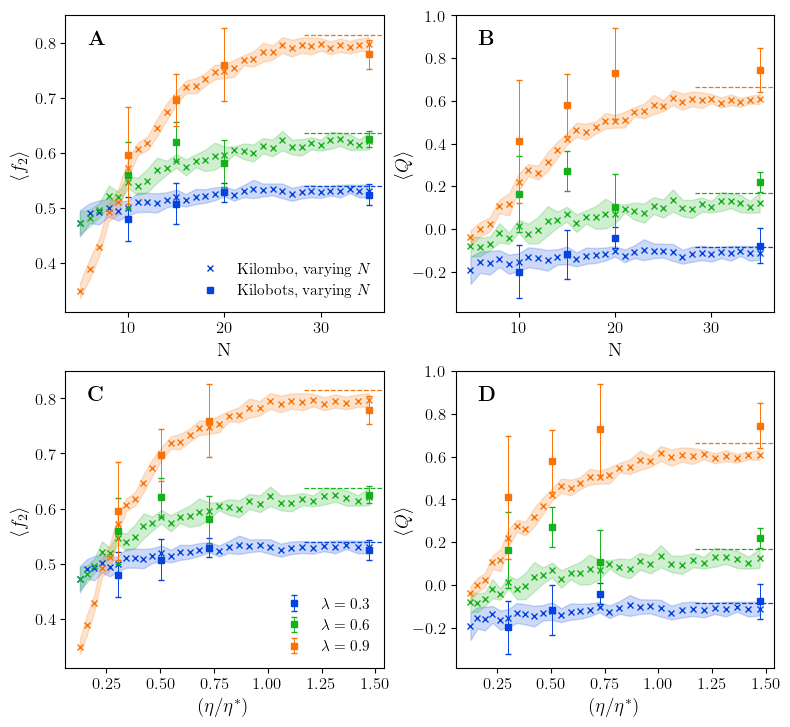

In [36]:
fig, ax = plt.subplots(2,2,figsize=(3.9*2,3.6*2))
ax[0,0].set(xlabel='N', ylabel=r'$\langle f_2 \rangle$')
ax[0,1].set(xlabel='N', ylabel=r'$\langle Q \rangle$')
ax[1,0].set(xlabel=r'$(\eta/\eta^*)$', ylabel=r'$\langle f_2 \rangle$')
ax[1,1].set(xlabel=r'$(\eta/\eta^*)$', ylabel=r'$\langle Q \rangle$')

ax[0,1].set_ylabel(r'$\langle Q \rangle$', labelpad=0.0)
ax[1,1].set_ylabel(r'$\langle Q \rangle$', labelpad=0.0)

# analytic mean field solution:
for l,sol_lamb,lcolor in zip(lambs, sols_lamb, lambs_colors):
    ax[0,0].axhline(sol_lamb[2], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[0,1].axhline(sol_lamb[2]-2*sol_lamb[1], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[1,0].axhline(sol_lamb[2], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[1,1].axhline(sol_lamb[2]-2*sol_lamb[1], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')

arena_r_k = arena_r - 0.2
# Kilombo simulations data, varying N 
interac_r = 5.0
for l,lcolor in zip(lambs,lambs_colors):
    # dfl = pd.read_csv(f'other_res_files/av_freq_vs_N_lambdas/av_freq_vs_N_lambda{l}_c100.dat', sep='\s+', names=['N', 'f0', 'sdf0', 'f1', 'sdf1', 'f2', 'sdf2', 'Ndata'])
    dfl = pd.read_csv(f'other_res_files/av_freq_vs_N_lambdas/nnav_freq_vs_N_lambda{l}_c100.dat', sep='\s+', names=['N', 'f0', 'sdf0', 'f1', 'sdf1', 'f2', 'sdf2', 'Q', 'sdQ', 'Ndata'])
    dfl['perc_dens'] = factor**2 * perc_dens(dfl['N'])
    dfl['perc_r'] = perc_r_kilobots(dfl['N'])
    # dfl['Q'] = dfl['f2'] - 2*dfl['f1']
    # dfl['sdQ'] = np.sqrt(4*(dfl['sdf1'])**2 + dfl['sdf2']**2)
    # labels to identify quenched/kilombo/kilobot
    if l == 0.3:
        ln3, = ax[0,0].plot(dfl['N'], dfl['f2'], color=lcolor, marker='x', markersize=4, lw=0.0, label='Kilombo, varying $N$')
    else:
        ax[0,0].plot(dfl['N'], dfl['f2'], color=lcolor, marker='x', markersize=4, lw=0.0)
    ax[0,0].fill_between(dfl['N'], dfl['f2']-dfl['sdf2'], dfl['f2']+dfl['sdf2'], color=lcolor, alpha=0.2)
    ax[0,1].plot(dfl['N'], dfl['Q'], color=lcolor, marker='x', markersize=4, lw=0.0)
    ax[0,1].fill_between(dfl['N'], dfl['Q']-dfl['sdQ'], dfl['Q']+dfl['sdQ'], color=lcolor, alpha=0.2)
    # rescaled plots, choose if rescale by r* or p*
    if use_rstar:
        ax[1,0].plot((interac_r/dfl['perc_r'])**2, dfl['f2'], color=lcolor, marker='x', markersize=4, lw=0.0)
        ax[1,0].fill_between((interac_r/dfl['perc_r'])**2, dfl['f2']-dfl['sdf2'], dfl['f2']+dfl['sdf2'], color=lcolor, alpha=0.2)
        ax[1,1].plot((interac_r/dfl['perc_r'])**2, dfl['Q'], color=lcolor, marker='x', markersize=4, lw=0.0)
        ax[1,1].fill_between((interac_r/dfl['perc_r'])**2, dfl['Q']-dfl['sdQ'], dfl['Q']+dfl['sdQ'], color=lcolor, alpha=0.2)
    else:
        ax[1,0].plot(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['f2'], color=lcolor, marker='x', markersize=4, lw=0.0)
        ax[1,0].fill_between(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['f2']-dfl['sdf2'], dfl['f2']+dfl['sdf2'], color=lcolor, alpha=0.2)
        ax[1,1].plot(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['Q'], color=lcolor, marker='x', markersize=4, lw=0.0)
        ax[1,1].fill_between(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['Q']-dfl['sdQ'], dfl['Q']+dfl['sdQ'], color=lcolor, alpha=0.2)


# Kilobot experiments data, varying N
interac_r = 5.0
df = pd.read_csv('other_res_files/kilobot_statVals_varN_varl_useLastIters_corrected_pi1_0.3_pi2_0.3_q1_7_q2_10.csv')
plot_ebars = True # wether to plot average with ebar (True) or all exprient resutls (False)

# jitterer_xax = [-0.04, 0.0, 0.04]
jitterer_xax = [0.0, 0.0, 0.0]
for l,lcolor,jit in zip(lambs,lambs_colors,jitterer_xax):
    dfl = df.query('lamb == @l').copy()
    dfl['perc_r'] = perc_r_kilobots(dfl['N'])
    dfl['perc_dens'] = factor**2 * perc_dens(dfl['N'])
    # dfl['Q'] = dfl['f2_avg'] - 2*dfl['f1_avg']
    dfl['Q'] = dfl['Q_avg']
    dfl['sdQ'] = dfl['Q_std_trajs']
    # dfl['sdQ'] = np.sqrt(4*dfl['f1_std_trajs']**2 + dfl['f2_std_trajs']**2)
    # plot with labels to identify quenched/kilombo/kilobot
    if not plot_ebars:
        Ns_plot_no_ebars, f1s, f2s = [], [], []
        for i,N in enumerate(list(dfl['N'])):
            f1s_N = [float(v) for v in list(dfl['f1_avgs_trajs'])[i][1:-1].split(',')]
            f2s_N = [float(v) for v in list(dfl['f2_avgs_trajs'])[i][1:-1].split(',')]
            Ns_plot_no_ebars.extend([N]*len(f2s_N)), f1s.extend(f1s_N), f2s.extend(f2s_N)
        Qs = [f2-2*f1 for f1,f2 in zip(f1s, f2s)]
        perc_r_no_ebars = perc_r_kilobots(np.array(Ns_plot_no_ebars))
        perc_dens_no_ebars = factor**2 * perc_dens(np.array(Ns_plot_no_ebars))
    if l == 0.3:
        if plot_ebars:
            ebar_container = ax[0,0].errorbar(dfl['N'], dfl['f2_avg'], dfl['f2_std_trajs'], color=lcolor, marker='s', markersize=4, lw=0.0, 
                    elinewidth=0.7, capsize=2.0, label = 'Kilobots, varying $N$')
            ln4 = ebar_container[0]
            ln4.set_label('Kilobots, varying $N$')
        else:
            ln4, = ax[0,0].plot(Ns_plot_no_ebars, f2s, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8, label='Kilobots, varying $N$')
    else:
        if plot_ebars:
            ax[0,0].errorbar(dfl['N'], dfl['f2_avg'], dfl['f2_std_trajs'], color=lcolor, marker='s', markersize=4, lw=0.0, 
                        elinewidth=0.7, capsize=2.0)
        else:
            ax[0,0].plot(Ns_plot_no_ebars, f2s, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8)
    # rest of the plots:
    if plot_ebars:
        ax[0,1].errorbar(dfl['N'], dfl['Q'], dfl['sdQ'], color=lcolor, marker='s', markersize=4, lw=0.0, 
                    elinewidth=0.7, capsize=2.0)
        # rescaled plots, choose if rescale by r* or p*
        if use_rstar:
            xpoints = (interac_r/dfl['perc_r'])**2+jit
        else:
            xpoints = (dfl['N']*(interac_r/arena_r_k)**2)/dfl['perc_dens']+jit
        ax[1,0].errorbar(xpoints, dfl['f2_avg'], dfl['f2_std_trajs'], color=lcolor, marker='s', markersize=4, lw=0.0, elinewidth=0.7, capsize=2.0, label=rf'$\lambda = {l}$')
        ax[1,1].errorbar(xpoints, dfl['Q'], dfl['sdQ'], color=lcolor, marker='s', markersize=4, lw=0.0, elinewidth=0.7, capsize=2.0)
    else:
        ax[0,1].plot(Ns_plot_no_ebars, Qs, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8)
        if use_rstar:
            xpoints = (interac_r/perc_r_no_ebars)**2+jit
        else:
            xpoints = (dfl['N']*(interac_r/arena_r_k)**2)/perc_dens_no_ebars+jit
        ax[1,0].plot(xpoints, f2s, color=lcolor, marker='^', markersize=4, lw=0.0, label=rf'$\lambda = {l}$', alpha=0.8)
        ax[1,1].plot(xpoints, Qs, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8)

# data type legend:
lns = [ln3, ln4]
# as errobar does not save the label in the line object and the workaround is too much
# https://stackoverflow.com/questions/19470104/python-matplotlib-errorbar-legend-picking
# I do this ugly workaround
# labels = [ln.get_label() for ln in lns[:-1]]
# labels.append(r'Kilobots, varying $N$')
labels = [ln.get_label() for ln in lns]
ax[0,0].legend(lns, labels, fontsize=11, frameon=False)

# lambda legend:
ax[1,0].legend(fontsize=11, frameon=False)

# plot A, B, C, D label:
ax[0,0].text(0.07, 0.9, r'\textbf{A}', transform=ax[0,0].transAxes)
ax[0,1].text(0.07, 0.9, r'\textbf{B}', transform=ax[0,1].transAxes)
ax[1,0].text(0.07, 0.9, r'\textbf{C}', transform=ax[1,0].transAxes)
ax[1,1].text(0.07, 0.9, r'\textbf{D}', transform=ax[1,1].transAxes)


fig.tight_layout(pad=0.3)
if use_rstar:
    # fig.savefig('scaling_multiplot_f2_Q_reescale_rstar_just_kilo.pdf')
    fig.savefig('scaling_multiplot_f2_Q_reescale_rstar_just_kilo_newQ.png')
else:
    fig.savefig('scaling_multiplot_f2_Q_reescale_etastar.pdf')

## 2x3 multiplot

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(3.8*3,3.7*2))
ax[0,0].set(xlabel='N', ylabel=r'$\langle f_2 \rangle$')
ax[1,0].set(xlabel='N', ylabel=r'$\langle Q \rangle$')
ax[0,1].set(xlabel='N', ylabel=r'$\langle f_2 \rangle$')
ax[1,1].set(xlabel='N', ylabel=r'$\langle Q \rangle$')
ax[0,2].set(xlabel=r'$(\eta/\eta^*)$', ylabel=r'$\langle f_2 \rangle$')
ax[1,2].set(xlabel=r'$(\eta/\eta^*)$', ylabel=r'$\langle Q \rangle$')

ax[1,0].set_ylabel(r'$\langle Q \rangle$', labelpad=0.0)
ax[1,1].set_ylabel(r'$\langle Q \rangle$', labelpad=0.0)
ax[1,2].set_ylabel(r'$\langle Q \rangle$', labelpad=0.0)

ax_ir_f2 = ax[0,0].twiny()
ax_ir_Q = ax[1,0].twiny()
ax_ir_f2.set_xlabel(r'$r_{\tt int}$')
ax_ir_Q.set_xlabel(r'$r_{\tt int}$')

for axis in ax[0,:]:
    axis.set_ylim(0.15, 0.85)
for axis in ax[1,:]:
    axis.set_ylim(-0.25, 0.75)


# analytic mean field solution:
for l,sol_lamb,lcolor in zip(lambs, sols_lamb, lambs_colors):
    ax[0,0].axhline(sol_lamb[2], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[1,0].axhline(sol_lamb[2]-2*sol_lamb[1], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[0,1].axhline(sol_lamb[2], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[1,1].axhline(sol_lamb[2]-2*sol_lamb[1], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[0,2].axhline(sol_lamb[2], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')
    ax[1,2].axhline(sol_lamb[2]-2*sol_lamb[1], 0.75, 1.0, color=lcolor, lw=0.9, ls='--')


# quenched simulations data, N = 35, varying interac_r
marker = '1'
N = 35
perc_dens_fixN = perc_dens(N)
perc_r_fixN = perc_r(N)
df = pd.read_csv(f'{model}/{N}_bots/sim_fp_results_er_{exclusion_r}_NOPUSH.csv')
df = df.loc[(df['arena_r']==arena_r) & (df['pi1']==pis[0]) & (df['pi2']==pis[1]) & (df['q1']==qs[0]) & (df['q2']==qs[1])]
df = df.query('interac_r <= 7.5')
df = df[df.interac_r != 20.0]
df = df.rename(columns={"lambda":"lamb"})
for l,lcolor in zip(lambs,lambs_colors):
    dfl = df.query('lamb == @l')
    # labels to identify quenched/kilombo/kilobot
    if l == 0.3:
        ln1, = ax_ir_f2.plot(dfl['interac_r'], dfl['f2'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, label='Quenched, varying $r_i$')
    else:
        ax_ir_f2.plot(dfl['interac_r'], dfl['f2'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
    ax_ir_Q.plot(dfl['interac_r'], dfl['Q'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
    # rescaled plots, choose if rescale by r* or p*
    if use_rstar:
        ax[0,2].plot((dfl['interac_r']/perc_r_fixN)**2, dfl['f2'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
        ax[1,2].plot((dfl['interac_r']/perc_r_fixN)**2, dfl['Q'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
    else:
        ax[0,2].plot(N*(dfl['interac_r']/arena_r)**2/perc_dens_fixN, dfl['f2'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)
        ax[1,2].plot(N*(dfl['interac_r']/arena_r)**2/perc_dens_fixN, dfl['Q'], color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75)



# quenched simulations data, interac_r = 6.5, varying N
marker = '.'
interac_r = 6.5
Ns = [10, 15, 20, 25, 30, 35, 40] # 50, 60, 70, 80
for l,lcolor in zip(lambs,lambs_colors):
    f1_dif_N, f2_dif_N = [], []
    for N in Ns:
        df = pd.read_csv(f'{model}/{N}_bots/sim_fp_results_er_{exclusion_r}_NOPUSH.csv')
        df = df.rename(columns={"lambda":"lamb"})
        df = df.query('arena_r == @arena_r & pi1 == @pis[0] & pi2 == @pis[1] & q1 == @qs[0] & q2 == @qs[1] & lamb == @l & interac_r == @interac_r')
        f1_dif_N.append(float(df['f1'].iloc[0])), f2_dif_N.append(float(df['f2'].iloc[0]))
    perc_r_difN = perc_r(np.array(Ns))
    perc_dens_difN = perc_dens(np.array(Ns))
    Q_dif_N = [f2-2*f1 for f2,f1 in zip(f2_dif_N, f1_dif_N)]
    # labels to identify quenched/kilombo/kilobot
    if l == 0.3:
        ln2, = ax[0,0].plot(Ns, f2_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.', label='Quenched, varying $N$')
    else:
        ax[0,0].plot(Ns, f2_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
    ax[1,0].plot(Ns, Q_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
    # rescaled plots, choose if rescale by r* or p*
    if use_rstar:
        ax[0,2].plot((interac_r/perc_r_difN)**2, f2_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
        ax[1,2].plot((interac_r/perc_r_difN)**2, Q_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
    else:
        ax[0,2].plot(np.array(Ns)*(interac_r/arena_r)**2/perc_dens_difN, f2_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')
        ax[1,2].plot(np.array(Ns)*(interac_r/arena_r)**2/perc_dens_difN, Q_dif_N, color=lcolor, marker=marker, markersize=5, lw=0.8, alpha=0.75, ls='-.')


arena_r_k = arena_r - 0.2
# Kilombo simulations data, varying N 
marker='x'
ls, lw = '--', 0.7
factor = 10.0 # neeeee
interac_r = 5.0
for l,lcolor in zip(lambs,lambs_colors):
    # dfl = pd.read_csv(f'other_res_files/av_freq_vs_N_lambdas/av_freq_vs_N_lambda{l}_c100.dat', sep='\s+', names=['N', 'f0', 'sdf0', 'f1', 'sdf1', 'f2', 'sdf2', 'Ndata'])
    dfl = pd.read_csv(f'other_res_files/av_freq_vs_N_lambdas/nav_freq_vs_N_lambda{l}_c100.dat', sep='\s+', names=['N', 'f0', 'sdf0', 'f1', 'sdf1', 'f2', 'sdf2', 'Q', 'Ndata'])
    dfl = dfl[dfl.N % 2 != 0]
    dfl['perc_dens'] = factor**2 * perc_dens(dfl['N'])
    dfl['perc_r'] = perc_r_kilobots(dfl['N'])
    # dfl['Q'] = dfl['f2'] - 2*dfl['f1']
    dfl['sdQ'] = np.sqrt(4*(dfl['sdf1'])**2 + dfl['sdf2']**2)
    # labels to identify quenched/kilombo/kilobot
    if l == 0.3:
        ln3, = ax[0,1].plot(dfl['N'], dfl['f2'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw, label='Kilombo, varying $N$')
    else:
        ax[0,1].plot(dfl['N'], dfl['f2'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
    ax[0,1].fill_between(dfl['N'], dfl['f2']-dfl['sdf2'], dfl['f2']+dfl['sdf2'], color=lcolor, alpha=0.2)
    ax[1,1].plot(dfl['N'], dfl['Q'], color=lcolor, marker=marker, ls=ls, markersize=4, lw=lw)
    ax[1,1].fill_between(dfl['N'], dfl['Q']-dfl['sdQ'], dfl['Q']+dfl['sdQ'], color=lcolor, alpha=0.2)
    # rescaled plots, choose if rescale by r* or p*
    if use_rstar:
        ax[0,2].plot((interac_r/dfl['perc_r'])**2, dfl['f2'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
        ax[0,2].fill_between((interac_r/dfl['perc_r'])**2, dfl['f2']-dfl['sdf2'], dfl['f2']+dfl['sdf2'], color=lcolor, alpha=0.2)
        ax[1,2].plot((interac_r/dfl['perc_r'])**2, dfl['Q'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
        ax[1,2].fill_between((interac_r/dfl['perc_r'])**2, dfl['Q']-dfl['sdQ'], dfl['Q']+dfl['sdQ'], color=lcolor, alpha=0.2)
    else:
        ax[0,2].plot(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['f2'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
        ax[0,2].fill_between(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['f2']-dfl['sdf2'], dfl['f2']+dfl['sdf2'], color=lcolor, alpha=0.2)
        ax[1,2].plot(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['Q'], color=lcolor, marker=marker, ls=ls, markersize=3, lw=lw)
        ax[1,2].fill_between(dfl['N']*(interac_r/arena_r_k)**2/dfl['perc_dens'], dfl['Q']-dfl['sdQ'], dfl['Q']+dfl['sdQ'], color=lcolor, alpha=0.2)


# Kilobot experiments data, varying N
interac_r = 5.0
df = pd.read_csv('other_res_files/kilobot_statVals_varN_varl_useLastIters_corrected_pi1_0.3_pi2_0.3_q1_7_q2_10.csv')
# df = pd.read_csv('other_res_files/kilobot_statVals_varN_varl_useLastIters_corrected_pi1_0.3_pi2_0.3_q1_7_q2_10_no_discarded.csv')
plot_ebars = True # wether to plot average with ebar (True) or all exprient resutls (False)

# jitterer_xax = [-0.04, 0.0, 0.04]
jitterer_xax = [0.0, 0.0, 0.0]
for l,lcolor,jit in zip(lambs,lambs_colors,jitterer_xax):
    dfl = df.query('lamb == @l').copy()
    dfl['perc_r'] = perc_r_kilobots(dfl['N'])
    dfl['perc_dens'] = factor**2 * perc_dens(dfl['N'])
    # dfl['Q'] = dfl['f2_avg'] - 2*dfl['f1_avg']
    dfl['Q'] = dfl['Q_avg']
    dfl['sdQ'] = np.sqrt(4*dfl['f1_std_trajs']**2 + dfl['f2_std_trajs']**2)
    # plot with labels to identify quenched/kilombo/kilobot
    if not plot_ebars:
        Ns_plot_no_ebars, f1s, f2s = [], [], []
        for i,N in enumerate(list(dfl['N'])):
            f1s_N = [float(v) for v in list(dfl['f1_avgs_trajs'])[i][1:-1].split(',')]
            f2s_N = [float(v) for v in list(dfl['f2_avgs_trajs'])[i][1:-1].split(',')]
            Ns_plot_no_ebars.extend([N]*len(f2s_N)), f1s.extend(f1s_N), f2s.extend(f2s_N)
        Qs = [f2-2*f1 for f1,f2 in zip(f1s, f2s)]
        perc_r_no_ebars = perc_r_kilobots(np.array(Ns_plot_no_ebars))
        perc_dens_no_ebars = factor**2 * perc_dens(np.array(Ns_plot_no_ebars))
    if l == 0.3:
        if plot_ebars:
            ebar_container = ax[0,1].errorbar(dfl['N'], dfl['f2_avg'], dfl['f2_std_trajs'], color=lcolor, marker='s', markersize=4, lw=0.0, 
                    elinewidth=0.7, capsize=2.0, label = 'Kilobots, varying $N$')
            ln4 = ebar_container[0]
            ln4.set_label('Kilobots, varying $N$')
        else:
            ln4, = ax[0,1].plot(Ns_plot_no_ebars, f2s, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8, label='Kilobots, varying $N$')
    else:
        if plot_ebars:
            ax[0,1].errorbar(dfl['N'], dfl['f2_avg'], dfl['f2_std_trajs'], color=lcolor, marker='s', markersize=4, lw=0.0, 
                        elinewidth=0.7, capsize=2.0)
        else:
            ax[0,1].plot(Ns_plot_no_ebars, f2s, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8)
    # rest of the plots:
    if plot_ebars:
        ax[1,1].errorbar(dfl['N'], dfl['Q'], dfl['sdQ'], color=lcolor, marker='s', markersize=4, lw=0.0, 
                    elinewidth=0.7, capsize=2.0)
        # rescaled plots, choose if rescale by r* or p*
        if use_rstar:
            xpoints = (interac_r/dfl['perc_r'])**2+jit
        else:
            xpoints = (dfl['N']*(interac_r/arena_r_k)**2)/dfl['perc_dens']+jit
        ax[0,2].errorbar(xpoints, dfl['f2_avg'], dfl['f2_std_trajs'], color=lcolor, marker='s', markersize=4, lw=0.0, elinewidth=0.7, capsize=2.0, label=rf'$\lambda = {l}$')
        ax[1,2].errorbar(xpoints, dfl['Q'], dfl['sdQ'], color=lcolor, marker='s', markersize=4, lw=0.0, elinewidth=0.7, capsize=2.0)
    else:
        ax[1,1].plot(Ns_plot_no_ebars, Qs, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8)
        if use_rstar:
            xpoints = (interac_r/perc_r_no_ebars)**2+jit
        else:
            xpoints = (dfl['N']*(interac_r/arena_r_k)**2)/perc_dens_no_ebars+jit
        ax[0,2].plot(xpoints, f2s, color=lcolor, marker='^', markersize=4, lw=0.0, label=rf'$\lambda = {l}$', alpha=0.8)
        ax[1,2].plot(xpoints, Qs, color=lcolor, marker='^', markersize=4, lw=0.0, alpha=0.8)

# data type legend:
lns_q = [ln1, ln2]
lns_k = [ln3, ln4]
# as errobar does not save the label in the line object and the workaround is too much
# https://stackoverflow.com/questions/19470104/python-matplotlib-errorbar-legend-picking
# I do this ugly workaround
# labels = [ln.get_label() for ln in lns[:-1]]
# labels.append(r'Kilobots, varying $N$')
labels_q = [ln.get_label() for ln in lns_q]
ax[0,0].legend(lns_q, labels_q, fontsize=11, frameon=False, loc='lower right')
labels_k = [ln.get_label() for ln in lns_k]
ax[0,1].legend(lns_k, labels_k, fontsize=11, frameon=False, loc='lower right')


# lambda legend:
ax[0,2].legend(fontsize=11, frameon=False, loc='lower right')

# plot A, B, C, D label:
ax[0,0].text(0.07, 0.89, r'\textbf{A}', transform=ax[0,0].transAxes)
ax[1,0].text(0.07, 0.89, r'\textbf{B}', transform=ax[1,0].transAxes)
ax[0,1].text(0.07, 0.89, r'\textbf{C}', transform=ax[0,1].transAxes)
ax[1,1].text(0.07, 0.89, r'\textbf{D}', transform=ax[1,1].transAxes)
ax[0,2].text(0.07, 0.89, r'\textbf{E}', transform=ax[0,2].transAxes)
ax[1,2].text(0.07, 0.89, r'\textbf{F}', transform=ax[1,2].transAxes)

fig.tight_layout(pad=0.3)
if use_rstar:
    # fig.savefig('scaling_multiplot_f2_Q_reescale_rstar_2x3multiplot.pdf')
    fig.savefig('scaling_multiplot_f2_Q_reescale_rstar_2x3multiplot.png')
else:
    fig.savefig('scaling_multiplot_f2_Q_reescale_etastar_2x3multiplot.pdf')

In [ ]:
# Check f0(N)
suffix = ''
# suffix = '_no_discarded'
dfkb = pd.read_csv(f'other_res_files/kilobot_statVals_varN_varl_useLastIters_corrected_pi1_0.3_pi2_0.3_q1_7_q2_10{suffix}.csv')
fig, ax = plt.subplots(1,2, figsize=(7.8,4.8), constrained_layout=True)
Ns = [10, 15, 20, 35]
ls = [0.3, 0.6, 0.9]
lambs_colors = ['xkcd:blue', 'xkcd:green', 'xkcd:orange']
for l,lc in zip(ls, lambs_colors):
    dfkb_l = dfkb.query('lamb == @l').copy()
    dfkm_l = pd.read_csv(f'other_res_files/av_freq_vs_N_lambdas/nav_freq_vs_N_lambda{l}_c100.dat', sep='\s+', names=['N', 'f0', 'sdf0', 'f1', 'sdf1', 'f2', 'sdf2', 'Q', 'sdQ', 'Ndata'])
    dfkm_l = dfkm_l.query('N in [10, 15, 20, 35]')
    dfkb_l['f0_frac'] = [f0kb/f0km for f0kb, f0km in zip(dfkb_l['f0_avg'], dfkm_l['f0'])]
    ax[0].plot(dfkb_l['N'], dfkb_l['f0_avg'], color=lc, marker='.', lw=0.8, label=f'$\lambda = {l}$')
    ax[0].plot(dfkm_l['N'], dfkm_l['f0'], color=lc, marker='none', lw=0.8, ls='--')
    ax[1].plot(dfkb_l['N'], dfkb_l['f0_frac'], color=lc, marker='.', lw=0.8)

ax[0].set(xlabel='N', ylabel='$f_0$')
ax[1].set(xlabel='N', ylabel='$f_0^{kb}/f_0^{km}$')
fig.legend(loc='upper center', fontsize=10)
fig.savefig('f0_change_ratio_kilombo_kilobots.png')